# **Objective: Learn various steps and due diligence needed to train successful classification models.**

## **Background:** Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not. Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular behavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of the readings were discarded if they seemed unreliable (out of range). Your job is to develop a pre-processing pipeline and a classifier, and also find out which subset of proteins is important in predicting which class.

# **Importing all the Libraries** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# **Importing the Data and doing exploratory Data Analysis(EDA)**

In [2]:
data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


In [3]:
data.info()
# this gives the us the no. of rows and columns and also their Non-Null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

# **Dividing the Data into :**
1. Independent Variables - **x**
2. Dependent Variables - **y1** and **y2**

In [4]:
# Independent variables
x = data.iloc[:,:-2]
# Genotype
y1 = data.iloc[:,-2]
# Treatment_Behavior
y2 = data.iloc[:,-1]

**Since we have binary and multiple values type Dependent variable we will have to encode them using** 

In [5]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
# lab_enc = LabelEncoder.fit(x)
y1_new = lab_enc.fit_transform(y1)
y2_new = lab_enc.fit_transform(y2)

In [6]:
# In order to keep y1_new and y2_new to be used for various function we will convert them back to the DataFrame form.
y1_new = pd.DataFrame(y1_new)
y2_new = pd.DataFrame(y2_new)

# **3. Develop a strategy to deal with missing variables.**
###     **We are using the multivariate feature imputation to deal with the missing**  
###    **data.**

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp = imp.fit(x)
x1 = imp.transform(pd.DataFrame(x))
x1

array([[0.50364388, 0.74719322, 0.4301753 , ..., 0.13179003, 0.1281856 ,
        1.67565235],
       [0.51461708, 0.68906355, 0.41177034, ..., 0.13510297, 0.1311187 ,
        1.74360965],
       [0.50918309, 0.7302468 , 0.41830878, ..., 0.13336183, 0.12743108,
        1.92642659],
       ...,
       [0.38218182, 0.58654545, 0.31854545, ..., 0.16364894, 0.19121209,
        1.43351401],
       [0.3656217 , 0.57220852, 0.29799225, ..., 0.1406397 , 0.21389934,
        1.54327375],
       [0.36560487, 0.59949893, 0.30153901, ..., 0.16626766, 0.2061288 ,
        1.52011013]])

In [8]:
col_lst = []
for col in x.columns.values:
  col_lst.append(col)

In [9]:
# scaling the data using standardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x1)
x = pd.DataFrame(scaler.transform(x1), columns=col_lst)
x

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.239745,0.428489,2.372452,1.471921,2.269552,-0.351734,-0.186528,-0.898820,0.648744,0.595213,...,-1.269701,-1.192868,-1.026373,-1.058433,-0.901764,-0.371984,-0.727673,-1.248514,-1.441819,0.943046
1,0.279648,0.216934,1.976690,1.393675,1.940975,-0.533878,-0.365510,-0.963191,0.479587,0.292333,...,-0.878703,-1.384700,-0.976669,-1.039198,-1.072989,-0.139388,-0.761256,-1.178310,-1.390064,1.144768
2,0.259888,0.366815,2.117287,1.095124,1.873152,-0.600347,-0.256006,-0.970144,0.585066,0.223626,...,-1.106122,-1.326024,-0.991436,-0.924510,-0.991907,-0.232612,-0.762340,-1.215206,-1.455133,1.687436
3,0.015969,-0.045054,0.833934,0.452418,1.181185,-0.249043,-0.228099,-1.073520,-0.163587,0.289803,...,-1.159352,-0.867383,-0.676364,-1.267675,-0.777146,-0.940673,-0.540947,-0.916792,-1.111582,1.016991
4,-0.010091,-0.043766,0.837716,0.157224,0.900303,-0.496664,-0.334981,-1.087947,-0.641792,0.111757,...,-0.702678,-0.958228,-0.687094,-1.160421,-0.801338,-0.258680,-0.683469,-1.067879,-1.085488,1.430089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.158354,-0.020962,-0.070527,-0.606540,-0.611634,0.045756,0.683866,-0.240028,0.313292,-0.447289,...,-0.346465,-0.109373,-0.916630,-0.178772,-0.593806,-0.145392,-0.324987,-0.943333,-0.339080,0.345848
758,-0.130826,0.109601,0.042935,-0.373432,-0.507093,0.096829,0.313293,-0.101537,0.638293,-0.385489,...,-0.563470,-0.210474,-0.934907,-0.269046,-0.875867,-0.085877,-0.269247,-0.866914,-0.210920,0.470936
759,-0.201944,-0.156166,-0.027925,-0.700047,-0.871242,0.681455,0.761884,-0.399737,0.366285,-0.388938,...,-0.510605,0.213444,-0.182602,-0.399556,-0.633493,-0.441216,-0.325553,-0.573401,-0.329708,0.224291
760,-0.262164,-0.208343,-0.469880,-0.895755,-1.183635,0.319300,0.296632,-0.445606,0.174685,-0.528465,...,-0.979130,-0.036733,-0.075136,-0.096908,-0.377361,0.154848,-0.344125,-1.060983,0.070612,0.550098


# **2(b). Are there significant correlations among variables?**


**We will use pearson correlation methd to find the highly correlated features among the given features**

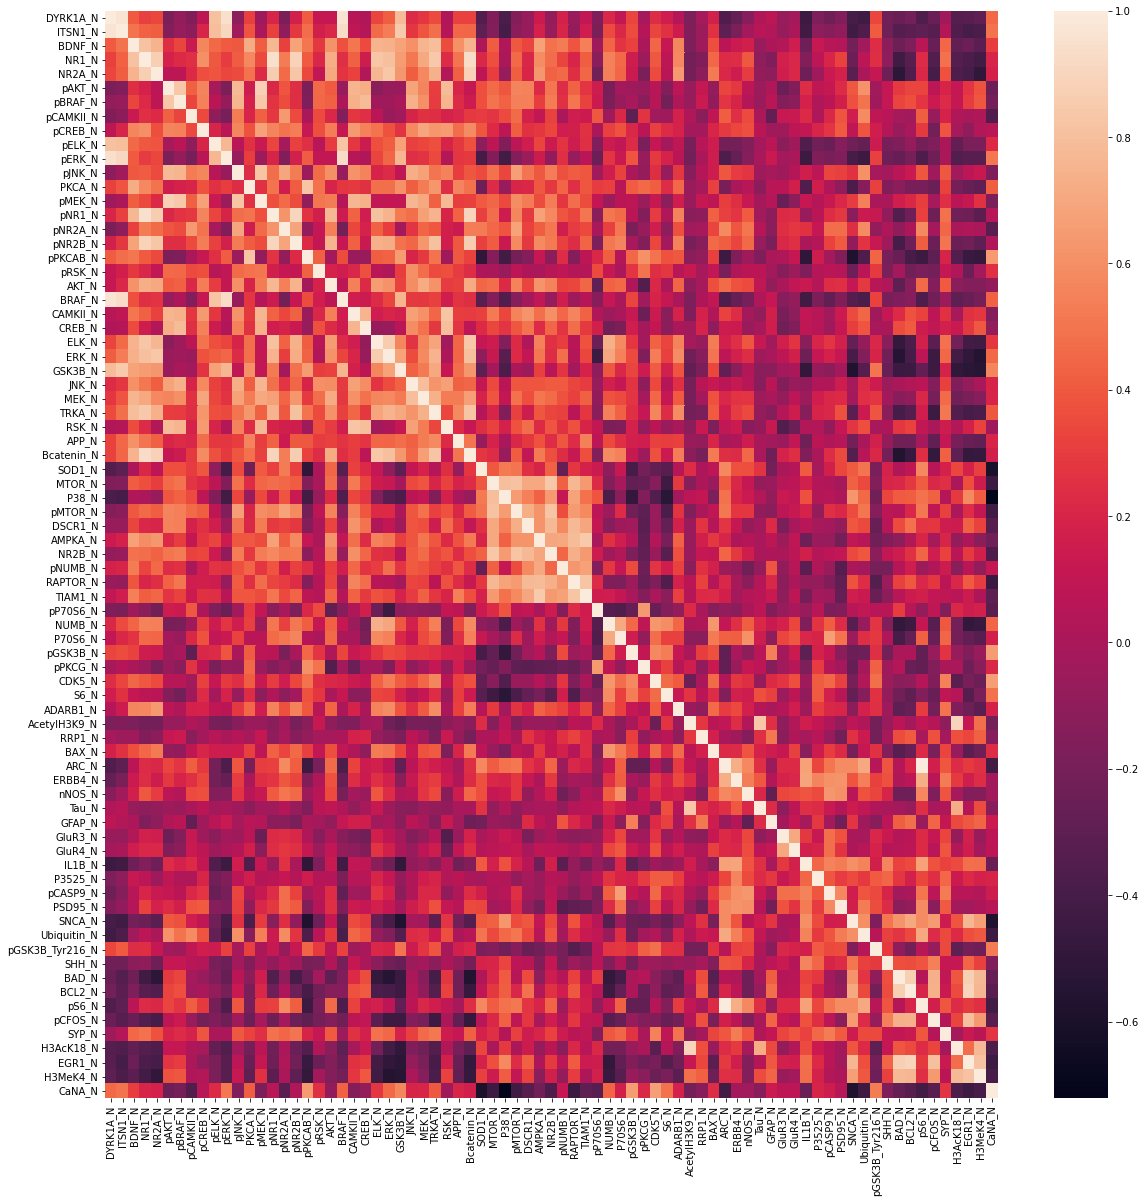

In [10]:
plt.figure(figsize=(20,20))
cor = x.corr()
plot = sns.heatmap(cor)


In [11]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(x , 0.9)
len(corr_features)

7

**We now have 7 features as highly correlated to other features so we will remove them from our x**

In [13]:
x_new = x.drop(corr_features, axis=1)
x_new

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.239745,2.372452,1.471921,2.269552,-0.351734,-0.186528,-0.898820,0.648744,0.595213,-0.148771,...,-0.158189,-1.269701,-1.192868,-1.026373,-0.901764,-0.371984,-0.727673,-1.248514,-1.441819,0.943046
1,0.279648,1.976690,1.393675,1.940975,-0.533878,-0.365510,-0.963191,0.479587,0.292333,-0.292219,...,0.025901,-0.878703,-1.384700,-0.976669,-1.072989,-0.139388,-0.761256,-1.178310,-1.390064,1.144768
2,0.259888,2.117287,1.095124,1.873152,-0.600347,-0.256006,-0.970144,0.585066,0.223626,-0.444364,...,-0.000721,-1.106122,-1.326024,-0.991436,-0.991907,-0.232612,-0.762340,-1.215206,-1.455133,1.687436
3,0.015969,0.833934,0.452418,1.181185,-0.249043,-0.228099,-1.073520,-0.163587,0.289803,-0.337665,...,-0.140312,-1.159352,-0.867383,-0.676364,-0.777146,-0.940673,-0.540947,-0.916792,-1.111582,1.016991
4,-0.010091,0.837716,0.157224,0.900303,-0.496664,-0.334981,-1.087947,-0.641792,0.111757,-0.528799,...,0.331411,-0.702678,-0.958228,-0.687094,-0.801338,-0.258680,-0.683469,-1.067879,-1.085488,1.430089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.158354,-0.070527,-0.606540,-0.611634,0.045756,0.683866,-0.240028,0.313292,-0.447289,0.075654,...,1.606940,-0.346465,-0.109373,-0.916630,-0.593806,-0.145392,-0.324987,-0.943333,-0.339080,0.345848
758,-0.130826,0.042935,-0.373432,-0.507093,0.096829,0.313293,-0.101537,0.638293,-0.385489,0.309205,...,2.043400,-0.563470,-0.210474,-0.934907,-0.875867,-0.085877,-0.269247,-0.866914,-0.210920,0.470936
759,-0.201944,-0.027925,-0.700047,-0.871242,0.681455,0.761884,-0.399737,0.366285,-0.388938,0.793714,...,1.060202,-0.510605,0.213444,-0.182602,-0.633493,-0.441216,-0.325553,-0.573401,-0.329708,0.224291
760,-0.262164,-0.469880,-0.895755,-1.183635,0.319300,0.296632,-0.445606,0.174685,-0.528465,0.231584,...,1.549577,-0.979130,-0.036733,-0.075136,-0.377361,0.154848,-0.344125,-1.060983,0.070612,0.550098


### **Analyzing x_new for any remaining correlations.**

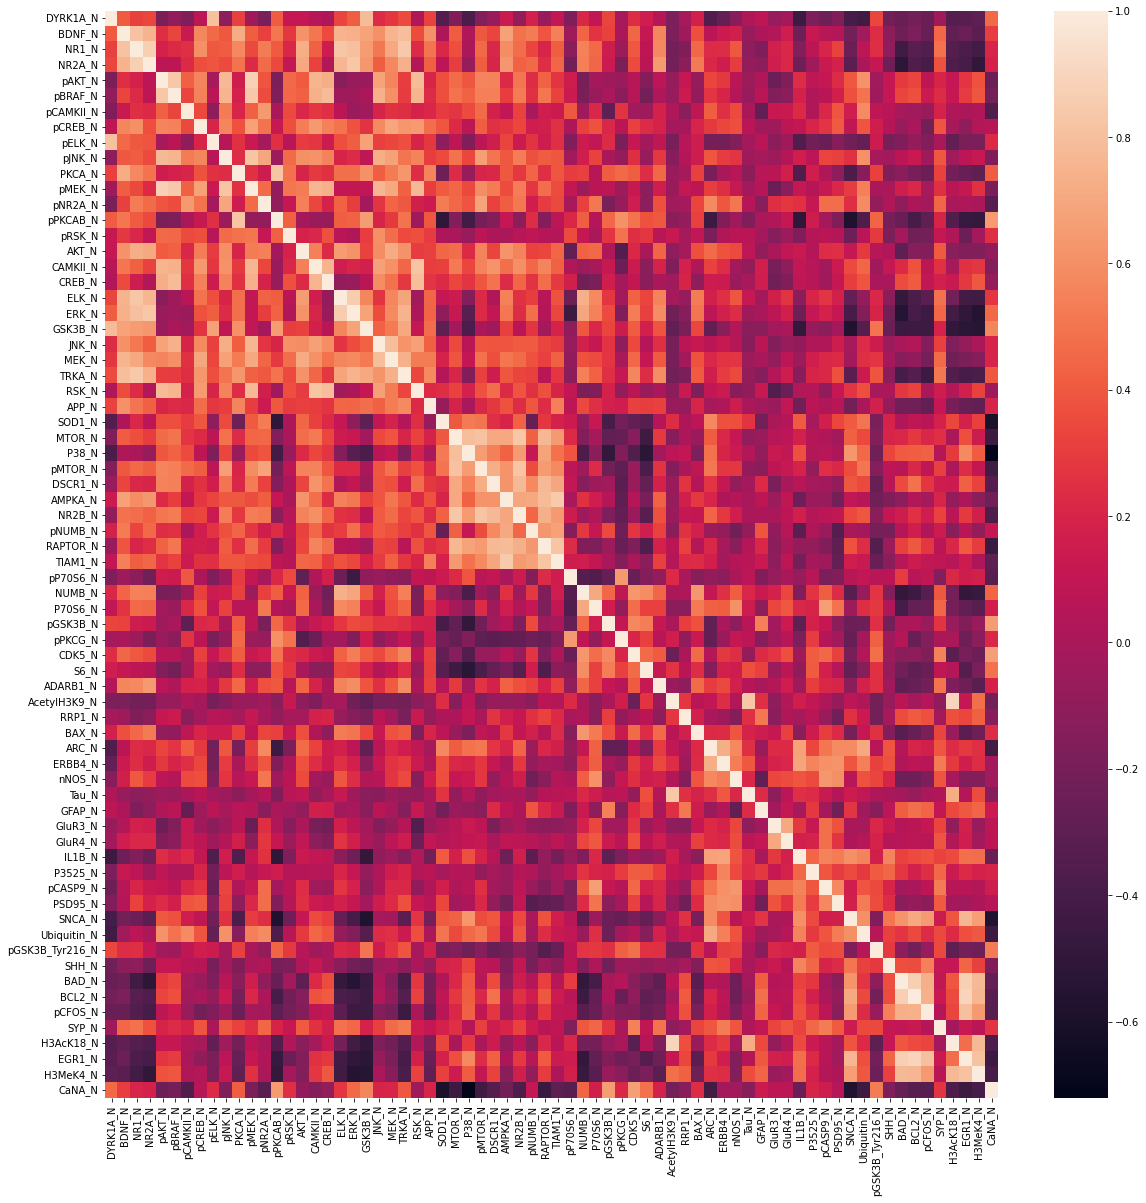

In [14]:
cor_new = x_new.corr()
plt.figure(figsize=(20,20))
plot=sns.heatmap(cor_new)

In [15]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features = correlation(x_new , 0.9)
len(corr_features)

0

### **We can now conclude that x_new has no correlated features whose correlation excedes 80% to any other feature, Hence no more further droping of features is required.**

# **c. Are the classes balanced?**
###     We will check for the all the classes in the output:
###     1. Genotype
###     2. Treatment Behaviour

Text(0, 0.5, 'Count')

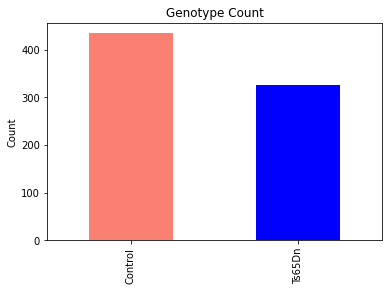

In [17]:
# y1_reverse = lab_enc.inverse_transform(y1_new)
# y1_reverse = pd.DataFrame(y1_reverse)
# y1_reverse.value_counts().plot(kind='bar', color=['salmon','blue'] , title='Genotype Count')
y1.value_counts().plot(kind='bar', color=['salmon','blue'] , title='Genotype Count')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

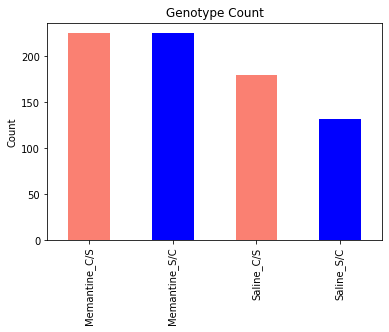

In [18]:
# y2_reverse = lab_enc.inverse_transform(y2_new)
# y2_reverse = pd.DataFrame(y2_reverse)
# y2_reverse.value_counts().plot(kind='bar', color=['salmon','blue'] , title='Treatment Behaviour')
y2.value_counts().plot(kind='bar', color=['salmon','blue'] , title='Genotype Count')
plt.ylabel('Count')

For both the types(Genotype , Treatment behaviour) we have approximately balanced classes

# **4. Select metrices that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc.**

Accuracy, confusion matrix and AUC-ROC are some of the most popular metrics. Precision-recall is a widely used metrics for classification problems.


**Accuracy** 

Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.
**But this metrix is only good for balanced dataset**


**A confusion matrix**

It is defined as the table that is often used to describe the performance of a classification model on a set of the test data for which the true values are known. **By using confusion matrix we can calculate precision recall and F1 score**


 **AUC-ROC** 
 
The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values.
 
**For binary class we will use balanced accuracy (mean of sensitivity and specificity), F1 score and ROC-AUC score because our classes are balanced.**

**For multi-class when we use one over rest method then our true negatives will increase so we can't use the balanced accuracy method therefore we will use another matrix i.e. micro or macro averages of F1 score**




# **5. Using five-fold cross-validation find the reasonable hyper-parameter settings for the following model types:**
   **a. Elastic net logistic regression (L1 and L2 weight)**

   **b. Neural network with single ReLU hidden layer and Softmax output           (number of neurons, weight decay)**

   **c. SVM (a few kernels, their hyper-parameters such as width, and slack penalty)**

   **d. Random forest (number of trees, max tree depth, max number of variables per node)**

In [19]:
# Imoporting Libraries and useful Classes and Features

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn import svm



In [20]:
hyperparameter = {'penalty':['elasticnet'] , 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] , 'max_iter':[100,120,140]}
log_reg = LogisticRegression(solver='saga')
score = ['balanced_accuracy','f1','roc_auc']
for i in score:
  gs_log_reg = GridSearchCV(estimator=log_reg , scoring=i , param_grid=hyperparameter , cv=5)
  gs_log_reg.fit(np.array(x_new) , np.squeeze(y1_new))
  print('Best Parameters')
  print(gs_log_reg.best_params_)
  print('best ' + i + ':' + str(gs_log_reg.best_score_))


Best Parameters
{'l1_ratio': 0.9, 'max_iter': 100, 'penalty': 'elasticnet'}
best balanced_accuracy:0.775741499879431
Best Parameters
{'l1_ratio': 0.9, 'max_iter': 100, 'penalty': 'elasticnet'}
best f1:0.7479881604843657
Best Parameters
{'l1_ratio': 0.9, 'max_iter': 100, 'penalty': 'elasticnet'}
best roc_auc:0.8136864667899151


In [21]:
param_log_reg = {'penalty':['elasticnet'] , 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] , 'max_iter':[100,120,140]}
log_reg = LogisticRegression(solver='saga', multi_class='multinomial')
score = ['balanced_accuracy','f1_macro','roc_auc_ovr']
for i in score:
  gs_log_reg = GridSearchCV(estimator=log_reg , scoring=i , param_grid=param_log_reg , cv=5)
  gs_log_reg.fit(np.array(x_new) , np.squeeze(y2_new))
  print('Best Parameters')
  print(gs_log_reg.best_params_)
  print('best ' + i + ':' + str(gs_log_reg.best_score_))

Best Parameters
{'l1_ratio': 0.3, 'max_iter': 120, 'penalty': 'elasticnet'}
best balanced_accuracy:0.720519943019943
Best Parameters
{'l1_ratio': 0.3, 'max_iter': 140, 'penalty': 'elasticnet'}
best f1_macro:0.7169109086840352
Best Parameters
{'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet'}
best roc_auc_ovr:0.9061750779118605


# b. Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight decay)

### Applying on Genotype

In [22]:
neu_net = MLPClassifier(activation='relu' , hidden_layer_sizes=(100))
param_neu_net = {'alpha':[0.001, 0.01, 0.1,1,10] , 'hidden_layer_sizes':[(10,),(15,),(20,),(30,),(50,)]}
score_neu_net = ['balanced_accuracy','f1','roc_auc']
for i in score_neu_net:
  gs_neu_net = GridSearchCV(estimator=neu_net , scoring=i , param_grid=param_neu_net , cv=5)
  gs_neu_net.fit(np.array(x_new) , np.squeeze(y1_new))
  print('Best Parameters')
  print(gs_neu_net.best_params_)
  print('best ' + i + ':' + str(gs_neu_net.best_score_))

Best Parameters
{'alpha': 1, 'hidden_layer_sizes': (10,)}
best balanced_accuracy:0.7524563941805321
Best Parameters
{'alpha': 1, 'hidden_layer_sizes': (20,)}
best f1:0.7210192765568872
Best Parameters
{'alpha': 1, 'hidden_layer_sizes': (50,)}
best roc_auc:0.805436861988586


### Applying on Treatment Behaviour

In [23]:
neu_net = MLPClassifier(activation='relu' , hidden_layer_sizes=(100))
param_neu_net = {'alpha':[0.001, 0.01, 0.1,1,10] , 'hidden_layer_sizes':[(10,),(15,),(20,),(30,),(50,)]}
score_neu_net = ['balanced_accuracy','f1_macro','roc_auc_ovr']
for i in score_neu_net:
  gs_neu_net = GridSearchCV(estimator=neu_net , scoring=i , param_grid=param_neu_net , cv=5)
  gs_neu_net.fit(np.array(x_new) , np.squeeze(y2_new))
  print('Best Parameters')
  print(gs_neu_net.best_params_)
  print('best ' + i + ':' + str(gs_neu_net.best_score_))

Best Parameters
{'alpha': 0.01, 'hidden_layer_sizes': (50,)}
best balanced_accuracy:0.7178988603988603
Best Parameters
{'alpha': 0.1, 'hidden_layer_sizes': (30,)}
best f1_macro:0.7252371743977675
Best Parameters
{'alpha': 0.001, 'hidden_layer_sizes': (10,)}
best roc_auc_ovr:0.9106475256588273


# c. SVM (a few kernels, their hyper-parameters such as width, and slack penalty)

### Applying on Genotype

In [24]:
param_svc = {'kernel':('rbf','linear','poly'),'C':[.001,.01,1,10],'degree':[2,3,5,8]}
svc = svm.SVC(probability=True)
score_svc = ['balanced_accuracy','f1','roc_auc']
for i in score_svc:
  gs_svc = GridSearchCV(estimator = svc,param_grid=param_svc,scoring = i)
  gs_svc.fit(np.array(x_new),np.squeeze(y1_new))
  print('Best param')
  print(gs_svc.best_params_)
  print('best ' + i+ ':' + str(gs_svc.best_score_))


Best param
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}
best balanced_accuracy:0.7955027730889801
Best param
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}
best f1:0.7638523827078572
Best param
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}
best roc_auc:0.8497939608284437


### Applying on Treatment Behaviour

In [25]:
param_svc = {'kernel':('rbf','linear','poly'),'C':[.001,.01,1,10],'degree':[2,3,5,8]}
svc = svm.SVC(probability=True)
score_svc = ['balanced_accuracy','f1_macro','roc_auc_ovr']
for i in score_svc:
  gs_svc = GridSearchCV(estimator = svc,param_grid=param_svc,scoring = i)
  gs_svc.fit(np.array(x_new),np.squeeze(y2_new))
  print('Best param')
  print(gs_svc.best_params_)
  print('best ' + i+ ':' + str(gs_svc.best_score_))


Best param
{'C': 1, 'degree': 2, 'kernel': 'linear'}
best balanced_accuracy:0.7372720797720799
Best param
{'C': 1, 'degree': 2, 'kernel': 'linear'}
best f1_macro:0.7360952826101016
Best param
{'C': 10, 'degree': 8, 'kernel': 'rbf'}
best roc_auc_ovr:0.9069989016348499


# d. Random forest (number of trees, max tree depth, max number of variables per node)

### Applying on Genotype

In [26]:
rf = RandomForestClassifier()
score_rf = ['balanced_accuracy','f1','roc_auc']

# declaring all the parameters i.e. number of trees, max tree depth, max number of variables per node
param_rf = {'max_depth': [2,4,6,8,10] , 'max_features':['auto','sqrt','log2'] , 'n_estimators': [10, 20, 50,100,200]}
for i in score_rf:
  gs_rf = GridSearchCV(estimator = rf, param_grid = param_rf,scoring = i, cv = 5, n_jobs = -1, verbose = 2)
  gs_rf.fit(np.array(x_new),np.squeeze(y1_new))
  print(gs_rf.best_params_)
  print('best ' + i+ ':' + str(gs_rf.best_score_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
best balanced_accuracy:0.6630712965195723
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 20}
best f1:0.6192236793455609
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 20}
best roc_auc:0.7540781823540443


### Applying to Treatment Behaviour

In [27]:
rf = RandomForestClassifier()
score_rf = ['balanced_accuracy','f1_macro','roc_auc_ovr']

# declaring all the parameters i.e. number of trees, max tree depth, max number of variables per node
param_rf = {'max_depth': [2,4,6,8,10] , 'max_features':['auto','sqrt','log2'] , 'n_estimators': [10, 20, 50,100,200]}
for i in score_rf:
  gs_rf = GridSearchCV(estimator = rf, param_grid = param_rf,scoring = i, cv = 5, n_jobs = -1, verbose = 2)
  gs_rf.fit(np.array(x_new),np.squeeze(y2_new))
  print(gs_rf.best_params_)
  print('best ' + i+ ':' + str(gs_rf.best_score_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}
best balanced_accuracy:0.6763247863247862
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10}
best f1_macro:0.6556326718523494
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
best roc_auc_ovr:0.8942737550235446


In [28]:
# y1_new = np.array(y1_new)
# y1_new

# 6. Check feature importance for each model to see if the same proteins are important for each model. Read up on how to find feature importance.

### Using RFECV feature from Feature scaling on Genotype

In [29]:
from sklearn.feature_selection import RFECV
svc = svm.SVC(kernel='linear')
svc.fit(x_new , y1_new)
selector_1 = RFECV(estimator=svc , step=1 , cv=2)
selector_1.fit(x_new , y1_new)
s_1 = selector_1.ranking_
# s_1.sort()
s_1 = pd.DataFrame(s_1)
# s_1.value_counts()
s_1

,0
0,13
1,46
2,10
3,27
4,30
...,...
65,15
66,50
67,16
68,37


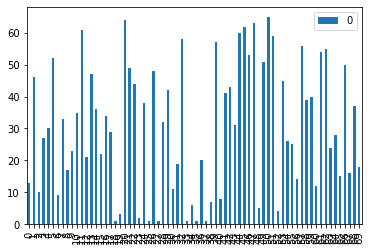

In [30]:
s_1.plot(kind='bar')

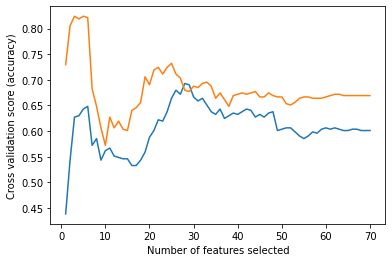

In [31]:
min_features_to_select = 1
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector_1.grid_scores_) + min_features_to_select),
    selector_1.grid_scores_,
)
plt.xticks()
plt.show()

Here we can see that we are gettingg approximately 84% accuracy with 14 features.

In [32]:
q_1 = selector_1.feature_names_in_
q_1 = pd.DataFrame(q_1)

In [33]:
res_1 = dict(zip(q_1.iloc[:,-1] ,
                 s_1.iloc[:,-1]))
res_1

{'ADARB1_N': 31,
 'AKT_N': 22,
 'AMPKA_N': 19,
 'APP_N': 1,
 'ARC_N': 63,
 'AcetylH3K9_N': 60,
 'BAD_N': 55,
 'BAX_N': 53,
 'BCL2_N': 24,
 'BDNF_N': 46,
 'CAMKII_N': 34,
 'CDK5_N': 41,
 'CREB_N': 29,
 'CaNA_N': 18,
 'DSCR1_N': 11,
 'DYRK1A_N': 13,
 'EGR1_N': 16,
 'ELK_N': 1,
 'ERBB4_N': 5,
 'ERK_N': 3,
 'GFAP_N': 59,
 'GSK3B_N': 64,
 'GluR3_N': 4,
 'GluR4_N': 45,
 'H3AcK18_N': 50,
 'H3MeK4_N': 37,
 'IL1B_N': 26,
 'JNK_N': 49,
 'MEK_N': 44,
 'MTOR_N': 1,
 'NR1_N': 10,
 'NR2A_N': 27,
 'NR2B_N': 58,
 'NUMB_N': 1,
 'P3525_N': 25,
 'P38_N': 32,
 'P70S6_N': 7,
 'PKCA_N': 35,
 'PSD95_N': 56,
 'RAPTOR_N': 6,
 'RRP1_N': 62,
 'RSK_N': 38,
 'S6_N': 43,
 'SHH_N': 54,
 'SNCA_N': 39,
 'SOD1_N': 48,
 'SYP_N': 15,
 'TIAM1_N': 1,
 'TRKA_N': 2,
 'Tau_N': 65,
 'Ubiquitin_N': 40,
 'nNOS_N': 51,
 'pAKT_N': 30,
 'pBRAF_N': 52,
 'pCAMKII_N': 9,
 'pCASP9_N': 14,
 'pCFOS_N': 28,
 'pCREB_N': 33,
 'pELK_N': 17,
 'pGSK3B_N': 57,
 'pGSK3B_Tyr216_N': 12,
 'pJNK_N': 23,
 'pMEK_N': 61,
 'pMTOR_N': 42,
 'pNR2A_N': 21,

In [34]:
colums_14 = []
for i,j in res_1.items():
  if j<9:
    colums_14.append(i)
colums_14

['ELK_N',
 'ERK_N',
 'TRKA_N',
 'APP_N',
 'MTOR_N',
 'pNUMB_N',
 'RAPTOR_N',
 'TIAM1_N',
 'NUMB_N',
 'P70S6_N',
 'pPKCG_N',
 'ERBB4_N',
 'GluR3_N']

Now we want x to have only these 14 columns.

In [35]:
x1_drop = [x_new.drop(colums_14, axis=1)]

In [36]:
x1_new = pd.DataFrame(x_new , columns=colums_14)
x1_new

,ELK_N,ERK_N,TRKA_N,APP_N,MTOR_N,pNUMB_N,RAPTOR_N,TIAM1_N,NUMB_N,P70S6_N,pPKCG_N,ERBB4_N,GluR3_N
0,2.032098,1.865816,0.974728,0.905988,0.136137,0.596277,0.484745,1.073032,0.012156,-0.625642,-0.409726,-0.731063,0.098131
1,1.717668,1.555130,0.696205,0.504819,-0.410179,0.165981,0.141166,0.614182,0.009997,-0.596986,-0.416401,-0.384552,0.374696
2,1.731097,1.689014,0.735024,0.369411,-0.387611,0.094857,-0.031941,0.495650,0.087457,-0.546870,-0.260318,-0.709516,0.560666
3,0.300142,0.754719,0.312073,0.149830,-0.321911,0.141857,0.268612,0.422032,-0.673897,-1.109104,-0.098511,-1.005008,0.288487
4,0.414846,0.640049,0.046655,-0.060892,-0.641406,-0.105587,-0.049102,0.040722,-0.726655,-1.062925,-0.037064,-0.921105,0.856006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.266566,-0.254991,-0.090301,0.157137,-0.590201,-0.291012,0.440202,-0.119859,1.087872,0.691587,1.743426,0.337865,-0.404641
758,-0.051534,0.036708,0.197198,0.675512,-0.226549,0.308245,0.864114,0.240236,1.037593,0.824921,1.713158,0.167175,-0.554998
759,-0.430283,-0.539054,-0.098828,0.259760,-0.099453,0.105678,0.801716,0.361479,0.076489,0.006819,1.526555,-0.222218,-0.866606
760,-0.498859,-0.642619,-0.216421,0.139152,-0.220305,-0.180338,0.986099,-0.035177,0.479165,0.300240,1.626188,-0.009936,-0.674514


### Using RFECV feature from Feature scaling on Treatment Behaviour

In [37]:
svc.fit(x_new , y2_new)
selector_2 = RFECV(estimator=svc , step=1 , cv=5)
selector_2.fit(x_new , y2_new)
s_2 = selector_2.ranking_
s_2.sort()
s_2 = pd.DataFrame(s_2)
# s_2.value_counts()
s_2

,0
0,1
1,1
2,1
3,1
4,1
...,...
65,42
66,43
67,44
68,45


Text(0, 0.5, 'Ranks')

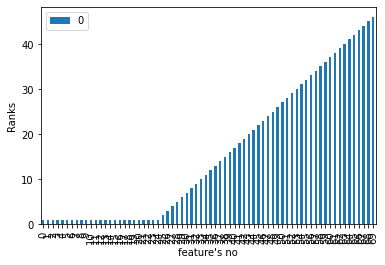

In [38]:
s_2.plot(kind='bar')
plt.xlabel("feature's no")
plt.ylabel('Ranks')

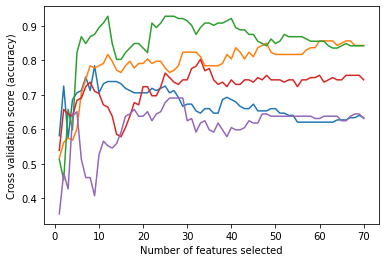

In [39]:
min_features_to_select = 1
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector_2.grid_scores_) + min_features_to_select),
    selector_2.grid_scores_,
)
plt.xticks()
plt.show()

In [40]:
q_2 = selector_2.feature_names_in_
q_2 = pd.DataFrame(q_2)
q_2

,0
0,DYRK1A_N
1,BDNF_N
2,NR1_N
3,NR2A_N
4,pAKT_N
...,...
65,SYP_N
66,H3AcK18_N
67,EGR1_N
68,H3MeK4_N


Here we can see that we are getting the accuracy vaalue of 95% with 22 features only.

In [41]:
res_2 = dict(zip(q_2.iloc[:,-1] , s_2.iloc[:,-1]))

In [42]:
colums_22 = []
for i,j in res_2.items():
  if j < 14:
    colums_22.append(i)


In [43]:
x2_drop = [x_new.drop(colums_22, axis=1)]

In [44]:
x2_new = pd.DataFrame(x_new , columns=colums_22)
x2_new

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N
0,0.239745,2.372452,1.471921,2.269552,-0.351734,-0.186528,-0.898820,0.648744,0.595213,-0.148771,...,0.136137,-0.839043,0.532073,-0.055233,1.325250,0.231229,0.596277,0.484745,1.073032,-0.587201
1,0.279648,1.976690,1.393675,1.940975,-0.533878,-0.365510,-0.963191,0.479587,0.292333,-0.292219,...,-0.410179,-0.951046,0.028366,-0.362699,0.870896,-0.226960,0.165981,0.141166,0.614182,-0.710235
2,0.259888,2.117287,1.095124,1.873152,-0.600347,-0.256006,-0.970144,0.585066,0.223626,-0.444364,...,-0.387611,-0.950864,-0.008826,-0.376977,0.599747,-0.139084,0.094857,-0.031941,0.495650,-0.847440
3,0.015969,0.833934,0.452418,1.181185,-0.249043,-0.228099,-1.073520,-0.163587,0.289803,-0.337665,...,-0.321911,-0.894665,-0.088587,-0.346606,0.303175,-0.196344,0.141857,0.268612,0.422032,0.136639
4,-0.010091,0.837716,0.157224,0.900303,-0.496664,-0.334981,-1.087947,-0.641792,0.111757,-0.528799,...,-0.641406,-1.072847,-0.525229,-0.442293,-0.131496,-0.586100,-0.105587,-0.049102,0.040722,0.101357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.158354,-0.070527,-0.606540,-0.611634,0.045756,0.683866,-0.240028,0.313292,-0.447289,0.075654,...,-0.590201,-0.321296,-0.531603,-0.151461,-0.667312,-0.432195,-0.291012,0.440202,-0.119859,0.734811
758,-0.130826,0.042935,-0.373432,-0.507093,0.096829,0.313293,-0.101537,0.638293,-0.385489,0.309205,...,-0.226549,0.403201,-0.325432,0.181454,0.118675,-0.070730,0.308245,0.864114,0.240236,0.837779
759,-0.201944,-0.027925,-0.700047,-0.871242,0.681455,0.761884,-0.399737,0.366285,-0.388938,0.793714,...,-0.099453,-0.159048,-0.627325,0.243386,-0.281676,-0.239170,0.105678,0.801716,0.361479,0.769760
760,-0.262164,-0.469880,-0.895755,-1.183635,0.319300,0.296632,-0.445606,0.174685,-0.528465,0.231584,...,-0.220305,0.389383,-0.627155,0.127333,-0.762632,-0.307436,-0.180338,0.986099,-0.035177,0.539888


# 7. See if removing some features systematically will improve your models (e.g. using recursive feature elimination

We have already removed some of the features sysematically for both Genotype and Treatment Behaviour from our Independent features which are the new variables:
1. x1_new - for Genotype
2. x2_new - for Treatment Behaviour

Now we will use these variables to train our models and then tuning them using GridSearchCV method and check that is there appreciable increase in the accuracy of our models.

### using Elastic Net Logistic regression 

In [45]:
# Genotype
hyperparameter = {'penalty':['elasticnet'] , 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] , 'max_iter':[100,120,140]}
log_reg = LogisticRegression(solver='saga')
score = ['balanced_accuracy','f1','roc_auc']
for i in score:
  gs_log_reg = GridSearchCV(estimator=log_reg , scoring=i , param_grid=hyperparameter , cv=5)
  gs_log_reg.fit(np.array(x1_new) , np.squeeze(y1_new))
  print('Best Parameters')
  print(gs_log_reg.best_params_)
  print('best ' + i + ':' + str(gs_log_reg.best_score_))

Best Parameters
{'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet'}
best balanced_accuracy:0.8630817458403666
Best Parameters
{'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet'}
best f1:0.8440557482478198
Best Parameters
{'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet'}
best roc_auc:0.9466077217801356


In [46]:
# Treatment Behaviour
param_log_reg = {'penalty':['elasticnet'] , 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] , 'max_iter':[100,120,140]}
log_reg = LogisticRegression(solver='saga', multi_class='multinomial')
score = ['balanced_accuracy','f1_macro','roc_auc_ovr']
for i in score:
  gs_log_reg = GridSearchCV(estimator=log_reg , scoring=i , param_grid=param_log_reg , cv=5)
  gs_log_reg.fit(np.array(x2_new) , np.squeeze(y2_new))
  print('Best Parameters')
  print(gs_log_reg.best_params_)
  print('best ' + i + ':' + str(gs_log_reg.best_score_))

Best Parameters
{'l1_ratio': 0.9, 'max_iter': 140, 'penalty': 'elasticnet'}
best balanced_accuracy:0.7757407407407407
Best Parameters
{'l1_ratio': 0.9, 'max_iter': 140, 'penalty': 'elasticnet'}
best f1_macro:0.7726837595488464
Best Parameters
{'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet'}
best roc_auc_ovr:0.9340869389748164


### Neural network with single ReLU hidden layer and Softmax output

In [47]:
# Genotype
neu_net = MLPClassifier(activation='relu' , hidden_layer_sizes=(100))
param_neu_net = {'alpha':[0.001, 0.01, 0.1,1,10] , 'hidden_layer_sizes':[(10,),(15,),(20,),(30,),(50,)]}
score_neu_net = ['balanced_accuracy','f1','roc_auc']
for i in score_neu_net:
  gs_neu_net = GridSearchCV(estimator=neu_net , scoring=i , param_grid=param_neu_net , cv=5)
  gs_neu_net.fit(np.array(x1_new) , np.squeeze(y1_new))
  print('Best Parameters')
  print(gs_neu_net.best_params_)
  print('best ' + i + ':' + str(gs_neu_net.best_score_))

Best Parameters
{'alpha': 0.01, 'hidden_layer_sizes': (15,)}
best balanced_accuracy:0.8937103126758299
Best Parameters
{'alpha': 0.01, 'hidden_layer_sizes': (10,)}
best f1:0.8857366339702477
Best Parameters
{'alpha': 1, 'hidden_layer_sizes': (15,)}
best roc_auc:0.9585279854245371


In [48]:
# Treatment Behaviour
neu_net = MLPClassifier(activation='relu' , hidden_layer_sizes=(100))
param_neu_net = {'alpha':[0.001, 0.01, 0.1,1,10] , 'hidden_layer_sizes':[(10,),(15,),(20,),(30,),(50,)]}
score_neu_net = ['balanced_accuracy','f1_macro','roc_auc_ovr']
for i in score_neu_net:
  gs_neu_net = GridSearchCV(estimator=neu_net , scoring=i , param_grid=param_neu_net , cv=5)
  gs_neu_net.fit(np.array(x2_new) , np.squeeze(y2_new))
  print('Best Parameters')
  print(gs_neu_net.best_params_)
  print('best ' + i + ':' + str(gs_neu_net.best_score_))

Best Parameters
{'alpha': 0.1, 'hidden_layer_sizes': (10,)}
best balanced_accuracy:0.7299074074074074
Best Parameters
{'alpha': 1, 'hidden_layer_sizes': (30,)}
best f1_macro:0.7006359466870481
Best Parameters
{'alpha': 0.001, 'hidden_layer_sizes': (30,)}
best roc_auc_ovr:0.9215485254422037


### SVM

In [49]:
# Genotype
param_svc = {'kernel':('rbf','linear','poly'),'C':[.001,.01,1,10],'degree':[2,3,5,8]}
svc = svm.SVC(probability=True)
score_svc = ['balanced_accuracy','f1','roc_auc']
for i in score_svc:
  gs_svc = GridSearchCV(estimator = svc,param_grid=param_svc,scoring = i)
  gs_svc.fit(np.array(x1_new),np.squeeze(y1_new))
  print('Best param')
  print(gs_svc.best_params_)
  print('best ' + i+ ':' + str(gs_svc.best_score_))


Best param
{'C': 10, 'degree': 2, 'kernel': 'linear'}
best balanced_accuracy:0.8742456394180532
Best param
{'C': 10, 'degree': 2, 'kernel': 'linear'}
best f1:0.8559689789010614
Best param
{'C': 1, 'degree': 2, 'kernel': 'linear'}
best roc_auc:0.9538000696621387


In [50]:
# Treatment Behaviour
param_svc = {'kernel':('rbf','linear','poly'),'C':[.001,.01,1,10],'degree':[2,3,5,8]}
svc = svm.SVC(probability=True)
score_svc = ['balanced_accuracy','f1_macro','roc_auc_ovr']
for i in score_svc:
  gs_svc = GridSearchCV(estimator = svc,param_grid=param_svc,scoring = i)
  gs_svc.fit(np.array(x2_new),np.squeeze(y2_new))
  print('Best param')
  print(gs_svc.best_params_)
  print('best ' + i+ ':' + str(gs_svc.best_score_))


Best param
{'C': 10, 'degree': 2, 'kernel': 'linear'}
best balanced_accuracy:0.7896509971509971
Best param
{'C': 10, 'degree': 2, 'kernel': 'linear'}
best f1_macro:0.7886410642069688
Best param
{'C': 1, 'degree': 3, 'kernel': 'linear'}
best roc_auc_ovr:0.9408546239145436


### Random forest

In [51]:
# Genotype
rf = RandomForestClassifier()
score_rf = ['balanced_accuracy','f1','roc_auc']

# declaring all the parameters i.e. number of trees, max tree depth, max number of variables per node
param_rf = {'max_depth': [2,4,6,8,10] , 'max_features':['auto','sqrt','log2'] , 'n_estimators': [10, 20, 50,100,200]}
for i in score_rf:
  gs_rf = GridSearchCV(estimator = rf, param_grid = param_rf,scoring = i, cv = 5, n_jobs = -1, verbose = 2)
  gs_rf.fit(np.array(x1_new),np.squeeze(y1_new))
  print(gs_rf.best_params_)
  print('best ' + i+ ':' + str(gs_rf.best_score_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 6, 'max_features': 'log2', 'n_estimators': 50}
best balanced_accuracy:0.7704870991077888
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 10}
best f1:0.7499066635208541
Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}
best roc_auc:0.8618685529030357


In [52]:
# Treatment Behaviour
rf = RandomForestClassifier()
score_rf = ['balanced_accuracy','f1_macro','roc_auc_ovr']

# declaring all the parameters i.e. number of trees, max tree depth, max number of variables per node
param_rf = {'max_depth': [2,4,6,8,10] , 'max_features':['auto','sqrt','log2'] , 'n_estimators': [10, 20, 50]}
for i in score_rf:
  gs_rf = GridSearchCV(estimator = rf, param_grid = param_rf,scoring = i, cv = 5, n_jobs = -1, verbose = 2)
  gs_rf.fit(np.array(x2_new),np.squeeze(y2_new))
  print(gs_rf.best_params_)
  print('best ' + i+ ':' + str(gs_rf.best_score_))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}
best balanced_accuracy:0.6323361823361823
Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 50}
best f1_macro:0.6347056065018434
Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10}
best roc_auc_ovr:0.8861984199042088


# **`Observation:`**

### After doing the feature selection and then using our model to predict difffrent scores we can se that overall accuracy of scores of almost every model has increased from that of the previous scores.
### Below given table contains the comparison between all these scores.

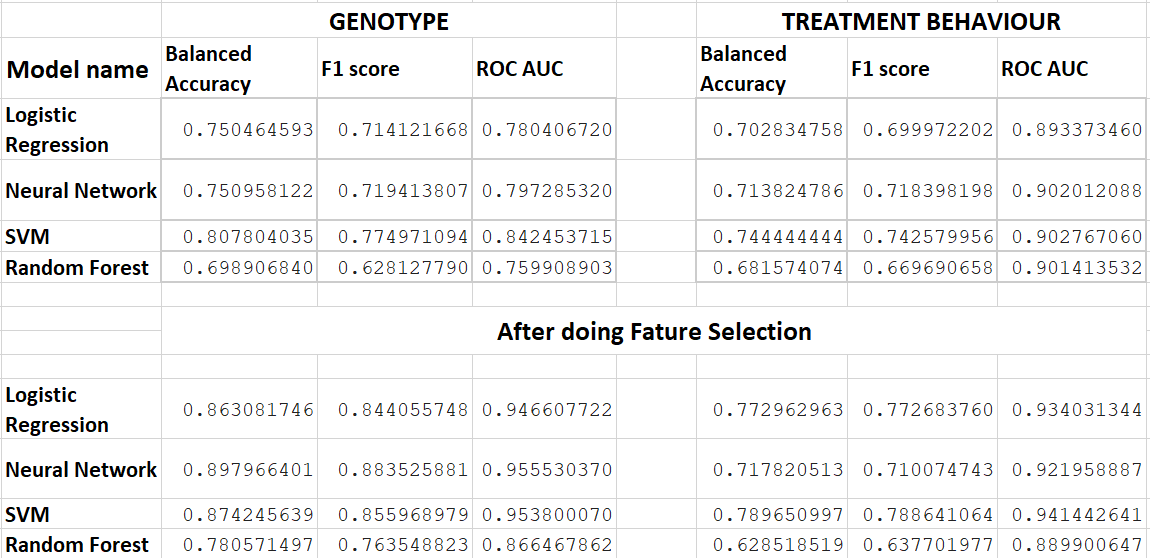

# 8. Finally, testing a few promising models on the test data:

### Now we will test the given test data with our already trained models to check the accuracy of our models.

### Importing the Test Datasheet.

In [53]:
data_test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv')

In [54]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            225 non-null    float64
 1   ITSN1_N             225 non-null    float64
 2   BDNF_N              225 non-null    float64
 3   NR1_N               225 non-null    float64
 4   NR2A_N              225 non-null    float64
 5   pAKT_N              225 non-null    float64
 6   pBRAF_N             225 non-null    float64
 7   pCAMKII_N           225 non-null    float64
 8   pCREB_N             225 non-null    float64
 9   pELK_N              225 non-null    float64
 10  pERK_N              225 non-null    float64
 11  pJNK_N              225 non-null    float64
 12  PKCA_N              225 non-null    float64
 13  pMEK_N              225 non-null    float64
 14  pNR1_N              225 non-null    float64
 15  pNR2A_N             225 non-null    float64
 16  pNR2B_N 

In [55]:
xt = data_test.iloc[:,:-2]
yt1 = data_test.iloc[:,-2]
yt2 = data_test.iloc[:,-1]

In [56]:
imp_t = IterativeImputer(max_iter=10, random_state=0)
imp_t = imp.fit(xt)
xt1 = imp.transform(pd.DataFrame(xt))
xt1

array([[0.62758167, 0.95418701, 0.44695832, ..., 0.15810257, 0.12173902,
        1.64998272],
       [0.65125332, 0.96202051, 0.46496392, ..., 0.16340471, 0.11685036,
        1.63898847],
       [0.64434594, 0.9671791 , 0.47005565, ..., 0.1602933 , 0.10850573,
        1.56492482],
       ...,
       [0.21613419, 0.36405751, 0.24169329, ..., 0.25700365, 0.30481121,
        1.14220463],
       [0.21236948, 0.36995984, 0.23903615, ..., 0.2558521 , 0.30848367,
        1.11271806],
       [0.25728988, 0.43262817, 0.28968935, ..., 0.27804804, 0.32608696,
        1.17178474]])

In [57]:
col_t_lst = []
for col in xt.columns.values:
  col_t_lst.append(col)

In [58]:
scaler = preprocessing.StandardScaler()
scaler.fit(xt1)
xt1 = pd.DataFrame(scaler.transform(xt1), columns=col_t_lst)
xt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         225 non-null    float64
 1   ITSN1_N          225 non-null    float64
 2   BDNF_N           225 non-null    float64
 3   NR1_N            225 non-null    float64
 4   NR2A_N           225 non-null    float64
 5   pAKT_N           225 non-null    float64
 6   pBRAF_N          225 non-null    float64
 7   pCAMKII_N        225 non-null    float64
 8   pCREB_N          225 non-null    float64
 9   pELK_N           225 non-null    float64
 10  pERK_N           225 non-null    float64
 11  pJNK_N           225 non-null    float64
 12  PKCA_N           225 non-null    float64
 13  pMEK_N           225 non-null    float64
 14  pNR1_N           225 non-null    float64
 15  pNR2A_N          225 non-null    float64
 16  pNR2B_N          225 non-null    float64
 17  pPKCAB_N        

In [59]:
yt1 = lab_enc.fit_transform(yt1)
yt2 = lab_enc.fit_transform(yt2)
xt1_new = pd.DataFrame(xt1 , columns=colums_14)
xt2_new = pd.DataFrame(xt1 , columns=colums_22)

# Logistic Regression

### Genotype

In [60]:
log_regt = LogisticRegression(penalty='elasticnet' , l1_ratio=0.1 , solver='saga' , max_iter=100)
log_regt.fit(np.array(x1_new) , np.squeeze(y1_new))
log_reg_yt1_pred = log_regt.predict(xt1_new)

In [61]:
lr_cm_1 = confusion_matrix(yt1,log_reg_yt1_pred)
lr_acc_score_1 = accuracy_score(yt1,log_reg_yt1_pred)
lr_roc_auc_1 = roc_auc_score(yt1,log_reg_yt1_pred)
lr_f1_1 = f1_score(yt1 , log_reg_yt1_pred ,)

In [62]:
lr_cm_1 , lr_acc_score_1 , lr_roc_auc_1 , lr_f1_1

(array([[108,  27],
        [ 23,  67]]),
 0.7777777777777778,
 0.7722222222222223,
 0.7282608695652174)

### Treatment Behaviour

In [63]:
log_regt = LogisticRegression(penalty='elasticnet' , l1_ratio=0.1 , solver='saga' , max_iter=100)
log_regt.fit(np.array(x2_new) , np.squeeze(y2_new))
log_reg_yt2_pred = log_regt.predict(xt2_new)

In [64]:
pred_prob = log_regt.predict_proba(xt2_new)

In [65]:
lr_cm_2 = confusion_matrix(yt2,log_reg_yt2_pred)
lr_acc_score_2 = accuracy_score(yt2,log_reg_yt2_pred)
lr_f1_2 = f1_score(yt2 , log_reg_yt2_pred , average = 'macro')
lr_roc_2 = roc_auc_score(yt2 , pred_prob , multi_class='ovr')

In [66]:
lr_cm_2 , lr_acc_score_2 , lr_f1_2 , lr_roc_2

(array([[50,  0, 10,  0],
        [ 0, 56,  0,  4],
        [41,  0, 19,  0],
        [ 0, 12,  0, 33]]),
 0.7022222222222222,
 0.6922739991361145,
 0.9330274971941638)

# Neural Network

### Genotype

In [67]:
neu_nett = MLPClassifier(alpha=0.001 , hidden_layer_sizes=(15,) , solver='adam' , activation='relu')
neu_nett.fit(np.array(x1_new) , np.squeeze(y1_new))
neu_nett_yt1_pred = neu_nett.predict(xt1_new)

In [68]:
nn_cm_1 = confusion_matrix(yt1,neu_nett_yt1_pred)
nn_acc_score_1 = accuracy_score(yt1,neu_nett_yt1_pred)
nn_roc_auc_1 = roc_auc_score(yt1,neu_nett_yt1_pred)
nn_f1_1 = f1_score(yt1 , neu_nett_yt1_pred)

In [69]:
nn_cm_1 , nn_acc_score_1 , nn_roc_auc_1 , nn_f1_1

(array([[102,  33],
        [ 28,  62]]),
 0.7288888888888889,
 0.7222222222222222,
 0.6702702702702703)

### Treatment Behaviour

In [70]:
neu_nett = MLPClassifier(alpha=0.01 , hidden_layer_sizes=(30,) , solver='adam' , activation='relu')
neu_nett.fit(np.array(x2_new) , np.squeeze(y2_new))
neu_nett_yt2_pred = neu_nett.predict(xt2_new)
pred_prob_2 = neu_nett.predict_proba(xt2_new)

In [71]:
nn_cm_2 = confusion_matrix(yt2,neu_nett_yt2_pred)
nn_acc_score_2 = accuracy_score(yt2,neu_nett_yt2_pred)
nn_roc_2 = roc_auc_score(yt2,pred_prob_2 , average='macro' , multi_class='ovr')
nn_f1_2 = f1_score(yt2 , neu_nett_yt2_pred , average='macro')

In [72]:
nn_cm_2 , nn_acc_score_2 , nn_roc_2 , nn_f1_2

(array([[54,  0,  6,  0],
        [ 0, 51,  2,  7],
        [31,  1, 28,  0],
        [ 0, 11,  0, 34]]),
 0.7422222222222222,
 0.9408361391694725,
 0.7370317216604404)

# SVC

### Genotype

In [73]:
svct = svm.SVC(kernel='linear' , degree=2 , C=1 )
svct.fit(np.array(x1_new) , np.squeeze(y1_new))
svc_yt1_pred = svct.predict(xt1_new)

In [74]:
svc_cm_1 = confusion_matrix(yt1,svc_yt1_pred)
svc_acc_score_1 = accuracy_score(yt1,svc_yt1_pred)
svc_roc_auc_1 = roc_auc_score(yt1,svc_yt1_pred )
svc_f1_1 = f1_score(yt1 , svc_yt1_pred )

In [75]:
svc_cm_1,svc_acc_score_1 , svc_roc_auc_1 , svc_f1_1

(array([[107,  28],
        [ 22,  68]]),
 0.7777777777777778,
 0.7740740740740741,
 0.7311827956989247)

### Treatment Behaviour

In [76]:
svct = svm.SVC(kernel='linear' , degree=3 , probability=True , C = 1)
svct.fit(np.array(x2_new) , np.squeeze(y2_new))
svc_yt2_pred = svct.predict(xt2_new)
pred_prob_3 = svct.predict_proba(xt2_new)

In [77]:
svc_cm_2 = confusion_matrix(yt2,neu_nett_yt2_pred)
svc_acc_score_2 = accuracy_score(yt2,neu_nett_yt2_pred)
svc_roc_2 = roc_auc_score(yt2,pred_prob_3 , multi_class='ovr' )
svc_f1_2 = f1_score(yt2 , neu_nett_yt2_pred , average='macro')

In [78]:
svc_cm_1 , svc_acc_score_1 , svc_f1_1 , svc_roc_2

(array([[107,  28],
        [ 22,  68]]),
 0.7777777777777778,
 0.7311827956989247,
 0.9198569023569023)

# Random Forest

### Genotype

In [79]:
rft = RandomForestClassifier(max_depth = 8 , max_features = 'auto' , n_estimators= 50 )
rft.fit(np.array(x1_new) , np.squeeze(y1_new))
yt1_pred = rft.predict(xt1_new)

In [80]:
rft_cm_1 = confusion_matrix(yt1 , yt1_pred)
rft_acc_score_1 = accuracy_score(yt1 , yt1_pred)
rft_roc_1 = roc_auc_score(yt1 , yt1_pred)
rft_f1_1 = f1_score(yt1 , yt1_pred)

In [81]:
rft_cm_1 , rft_acc_score_1 , rft_roc_1 , rft_f1_1

(array([[109,  26],
        [ 32,  58]]),
 0.7422222222222222,
 0.7259259259259259,
 0.6666666666666666)

### Treatment Behaviour

In [82]:
rft = RandomForestClassifier(max_depth = 8 , max_features = 'auto' , n_estimators= 1150 )
rft.fit(np.array(x2_new) , np.squeeze(y2_new))
yt2_pred = rft.predict(xt2_new)
pred_prob_4 = rft.predict_proba(xt2_new)

In [83]:
rft_cm_2 = confusion_matrix(yt2 , yt2_pred)
rft_acc_score_2 = accuracy_score(yt2 , yt2_pred)
rft_roc_2 = roc_auc_score(yt2 , pred_prob_4 , multi_class='ovr' , average='macro')
rft_f1_2 = f1_score(yt2 , yt2_pred , average='macro')

In [84]:
rft_cm_2 , rft_acc_score_2 , rft_roc_2 , rft_f1_2

(array([[39,  0, 21,  0],
        [ 0, 51,  0,  9],
        [27,  0, 33,  0],
        [ 0, 15,  0, 30]]), 0.68, 0.8998484848484848, 0.6804511278195489)

# 9.Write your observations and thoughts
1.We started our analysis by exploratory data analysis i.e. imputing and scaling, then we removed the correlated variables.

2.After that we calculated reasonable hyper-parameters for various models for binary and multi-class classification.

3.After this we checked our model's accuracy after feature selection and we found that for all the models accuracy has increased after feature selection

4.Finally we tested our two of the models (i.e. Neural network and SVM) on test data and it provided pretty good accuracy (more than 80%) for both binary and multi-class classification



**Conclusion:**
While dealing with data it's necessarry to remove undesirable and also replace missing variable and our final accuracy depends totally on the hyper-parameters
and error matrices we are choosing for our model therefore we need to be very cautious while selecting them for our model